In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/DataPCA.csv') #Reading the data 

In [3]:
data #checking data

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367
...,...,...,...,...,...,...,...
185,0.894296,-1.270097,4.618647,4.005702,4.634847,0.156118,-0.215169
186,0.926559,-1.203508,4.766199,3.907673,4.538084,0.073321,-0.197924
187,1.678706,-1.227245,5.613809,2.864530,4.046335,-0.906304,-0.099063
188,1.693254,-1.323340,5.470576,3.023584,4.208331,-0.693895,-0.189082


In [4]:
data.describe() #Describing characteristics of data

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,1.286644,-1.135656,5.254907,3.342504,4.233765,-0.412937,-0.119058
std,0.508765,0.233921,0.549171,0.995603,0.328327,0.482069,0.239692
min,-0.074116,-1.734167,3.967657,0.649854,3.306106,-1.936695,-0.786517
25%,0.928244,-1.298233,4.883782,2.645102,4.020569,-0.741547,-0.278181
50%,1.271034,-1.145689,5.249568,3.400840,4.242064,-0.377963,-0.122850
75%,1.637682,-0.997318,5.625487,3.996560,4.463035,-0.096413,0.036964
max,2.504835,-0.440730,6.857529,5.817673,5.056247,0.823165,0.526882


We can see from the count that there is no missing value in any column.

In [5]:
data.corr() #Correlation matrix

,x1,x2,x3,x4,x5,x6,x7
x1,1.000000,-0.215312,0.845144,-0.925055,-0.438377,-0.797697,-0.600302
x2,-0.215312,1.000000,0.330902,-0.023173,-0.699865,-0.205240,0.551619
x3,0.845144,0.330902,1.000000,-0.883491,-0.835252,-0.920829,-0.218335
x4,-0.925055,-0.023173,-0.883491,1.000000,0.522152,0.774758,0.627162
x5,-0.438377,-0.699865,-0.835252,0.522152,1.000000,0.834780,-0.327854
x6,-0.797697,-0.205240,-0.920829,0.774758,0.834780,1.000000,0.058808
x7,-0.600302,0.551619,-0.218335,0.627162,-0.327854,0.058808,1.000000


We can see that x1 and x2 are very weakly related to each other.

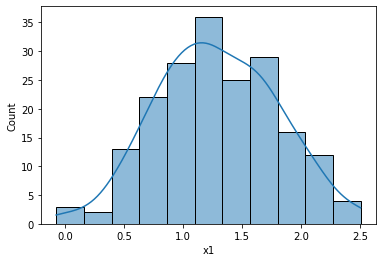

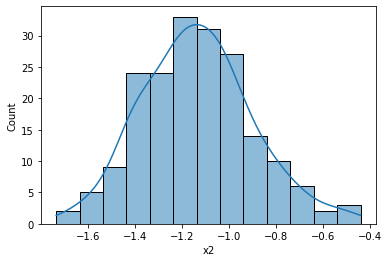

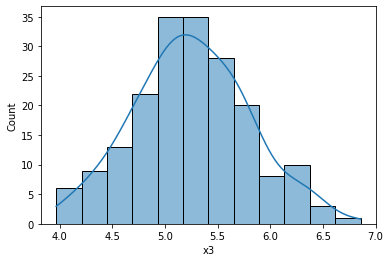

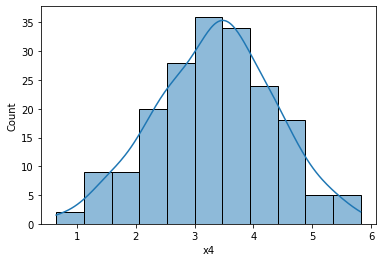

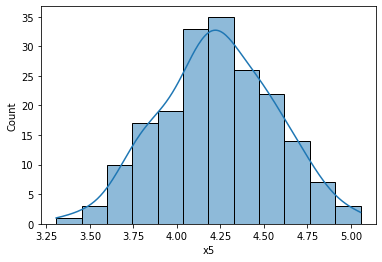

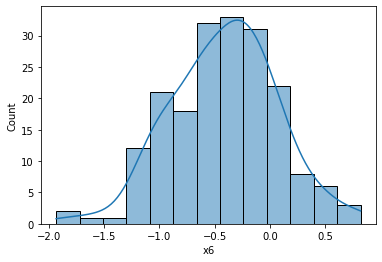

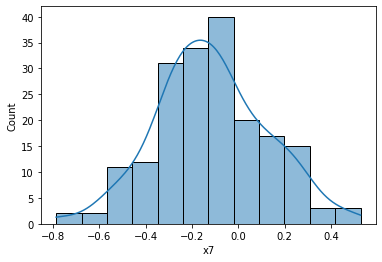

In [6]:
import matplotlib.pyplot as plt
for column in data.columns.values:
  sns.histplot(data[column],kde=True) #PLotting histogram for each feature(kde plot a smooth curve denoting estimated distribution.)
  plt.show()

We can visualize that the data is distributed more or less normally, however we will standardize it.

In [7]:
from sklearn.preprocessing import StandardScaler # Package for standardizing
scaled_data = StandardScaler().fit_transform(data) #Fitting and transforming the data into standardized form
scaled_data #Standardized data

array([[-0.87970185,  0.20358106, -0.7178119 , ...,  0.24030982,
         0.572178  ,  0.81782988],
       [ 0.06690112, -0.16483345, -0.01377784, ...,  0.15160586,
         0.10228252, -0.215624  ],
       [ 0.49517799, -0.17241562,  0.55017623, ..., -0.80067599,
        -0.98890001,  0.83524673],
       ...,
       [ 0.7726511 , -0.39257257,  0.65526181, ..., -0.57237401,
        -1.02614162,  0.08363971],
       [ 0.80132199, -0.80445602,  0.39375587, ..., -0.07767042,
        -0.58435868, -0.29291356],
       [ 1.02385053, -0.906317  ,  0.5235481 , ...,  0.02058323,
        -0.57800454, -0.43309953]])

In [11]:
scaled_data = pd.DataFrame(scaled_data,columns = data.columns.values) #COnverting the data into dataframe

In [12]:
scaled_data

,x1,x2,x3,x4,x5,x6,x7
0,-0.879702,0.203581,-0.717812,0.937130,0.240310,0.572178,0.817830
1,0.066901,-0.164833,-0.013778,-0.047812,0.151606,0.102283,-0.215624
2,0.495178,-0.172416,0.550176,0.052044,-0.800676,-0.988900,0.835247
3,-1.819170,0.021640,-1.688840,2.220573,0.934360,1.570859,1.551955
4,0.554357,0.089743,0.524348,-0.855438,-0.236998,-0.409231,-0.720773
...,...,...,...,...,...,...,...
185,-0.773213,-0.576244,-1.161643,0.667887,1.224821,1.183561,-0.402035
186,-0.709632,-0.290830,-0.892252,0.569165,0.929327,1.011354,-0.329898
187,0.772651,-0.392573,0.655262,-0.481353,-0.572374,-1.026142,0.083640
188,0.801322,-0.804456,0.393756,-0.321174,-0.077670,-0.584359,-0.292914


#b.

In [13]:
from sklearn.decomposition import PCA
pca = PCA() # Defining the PCA function
train_pca = pca.fit(scaled_data) #Fitting our standardized data into pca

#c.

In [14]:
ex_var = list(pca.explained_variance_) #Gettig values of explained variance

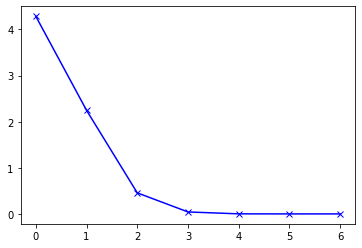

In [16]:
import matplotlib.pyplot as plt
plt.plot(np.arange(data.shape[1]),ex_var,'bx-') #Plotting Number of components vs explained variance curve

In [ ]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_) #Getting Cumulative Explained variance
import plotly.express as px #For visualizing the region(area)
px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "Num of Components", "y": "Explained Variance"})

From here we can also observe that the appropriate number of dimensions is 2.

#d.

In [ ]:
from sklearn.metrics import mean_squared_error #For calculating mean squared error
for i in range(1,8):   #Since 7 is the dimension of the given dataset
    pca = PCA(n_components=i) #Calling PCA
    reconstructed = pca.inverse_transform(pca.fit_transform(scaled_data)) #Reconstructed data with 
    mse = mean_squared_error(scaled_data, reconstructed,squared=True) #mean squared error between our standardized data and the reconstructed data
    print("MSE: {} with {} components".format(mse, i)) #Printing statement
  

MSE: 0.39072943283022843 with 1 components
MSE: 0.07126846555354299 with 2 components
MSE: 0.006312264485441588 with 3 components
MSE: 0.00023987869019137436 with 4 components
MSE: 2.3851029452934065e-05 with 5 components
MSE: 4.004945107075588e-06 with 6 components
MSE: 9.911601657016492e-31 with 7 components


Discussed with:
1. Rupesh Yadav(21i190004)
2. Abhishek Gupta(21i190005)

Sources:
https://plotly.com/python/pca-visualization/

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


https://blog.paperspace.com/dimension-reduction-with-principal-component-analysis/#:~:text=Principal%20Component%20Analysis(PCA)%20is,a%20set%20of%20orthogonal%20axes.

